In [1]:
import pandas as pd
import numpy as np
import pylidc as pl
import os
import matplotlib.pyplot as plt
from pathlib import Path
from pylidc.utils import consensus
from skimage.measure import find_contours

In [2]:
class Nodule:
    def __init__(self, images):
        self.images = images

In [3]:
class Patient:
    def __init__(self, idx, dicom_file, scan):
        self.idx = idx
        self.dicom_file = dicom_file
        self.scan = scan
        self.data = []
        self.images = []

In [7]:
dicom_dir = Path(r"C:\Users\joaom\Desktop\manifest-1600709154662\LIDC-IDRI")

In [8]:
all_patients = list(dicom_dir.glob("LID*"))
all_patients

[WindowsPath('C:/Users/joaom/Desktop/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0001'),
 WindowsPath('C:/Users/joaom/Desktop/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0002'),
 WindowsPath('C:/Users/joaom/Desktop/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0003'),
 WindowsPath('C:/Users/joaom/Desktop/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0004'),
 WindowsPath('C:/Users/joaom/Desktop/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0005'),
 WindowsPath('C:/Users/joaom/Desktop/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0006'),
 WindowsPath('C:/Users/joaom/Desktop/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0007'),
 WindowsPath('C:/Users/joaom/Desktop/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0008'),
 WindowsPath('C:/Users/joaom/Desktop/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0009'),
 WindowsPath('C:/Users/joaom/Desktop/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0010'),
 WindowsPath('C:/Users/joaom/Desktop/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0011'),
 WindowsPath('C:/Users/joaom/Des

In [9]:
patient_list = []

for path in all_patients:
    patient_id = str(path)[-14:]
    patient_scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == patient_id).first()
    patient = Patient(patient_id, path, patient_scan)
    patient_list.append(patient)

print(patient_list[0:5])

[<__main__.Patient object at 0x0000018926911750>, <__main__.Patient object at 0x0000018927AC4710>, <__main__.Patient object at 0x000001892A37CA10>, <__main__.Patient object at 0x000001892A3A5850>, <__main__.Patient object at 0x000001892A3A5290>]


In [18]:
for patient in patient_list[0:5]:
    print(patient.idx)
    print(patient.dicom_file)
    print(patient.scan)
    print("-------------------")

LIDC-IDRI-0001
C:\Users\joaom\Desktop\testeteste\manifest-1600709154662\LIDC-IDRI\LIDC-IDRI-0001
Scan(id=12,patient_id=LIDC-IDRI-0001)
-------------------
LIDC-IDRI-0002
C:\Users\joaom\Desktop\testeteste\manifest-1600709154662\LIDC-IDRI\LIDC-IDRI-0002
Scan(id=13,patient_id=LIDC-IDRI-0002)
-------------------
LIDC-IDRI-0003
C:\Users\joaom\Desktop\testeteste\manifest-1600709154662\LIDC-IDRI\LIDC-IDRI-0003
Scan(id=14,patient_id=LIDC-IDRI-0003)
-------------------
LIDC-IDRI-0004
C:\Users\joaom\Desktop\testeteste\manifest-1600709154662\LIDC-IDRI\LIDC-IDRI-0004
Scan(id=15,patient_id=LIDC-IDRI-0004)
-------------------
LIDC-IDRI-0005
C:\Users\joaom\Desktop\testeteste\manifest-1600709154662\LIDC-IDRI\LIDC-IDRI-0005
Scan(id=16,patient_id=LIDC-IDRI-0005)
-------------------


In [19]:
demo_patient = patient_list[2]

In [20]:
scan = demo_patient.scan
print(scan)

Scan(id=14,patient_id=LIDC-IDRI-0003)


In [21]:
annotations = scan.annotations
annotations

[Annotation(id=90,scan_id=14),
 Annotation(id=91,scan_id=14),
 Annotation(id=92,scan_id=14),
 Annotation(id=93,scan_id=14),
 Annotation(id=94,scan_id=14),
 Annotation(id=95,scan_id=14),
 Annotation(id=96,scan_id=14),
 Annotation(id=97,scan_id=14),
 Annotation(id=98,scan_id=14),
 Annotation(id=99,scan_id=14),
 Annotation(id=100,scan_id=14),
 Annotation(id=101,scan_id=14),
 Annotation(id=102,scan_id=14)]

In [22]:
nods = scan.cluster_annotations()

print("%s has %d nodules." % (scan, len(nods)))

Scan(id=14,patient_id=LIDC-IDRI-0003) has 4 nodules.


In [23]:
print(nods)

[[Annotation(id=102,scan_id=14)], [Annotation(id=90,scan_id=14), Annotation(id=93,scan_id=14), Annotation(id=98,scan_id=14), Annotation(id=99,scan_id=14)], [Annotation(id=91,scan_id=14), Annotation(id=95,scan_id=14), Annotation(id=97,scan_id=14), Annotation(id=100,scan_id=14)], [Annotation(id=92,scan_id=14), Annotation(id=94,scan_id=14), Annotation(id=96,scan_id=14), Annotation(id=101,scan_id=14)]]


In [24]:
for i,nod in enumerate(nods):
    print("Nodule %d has %d annotations." % (i+1, len(nods[i])))

Nodule 1 has 1 annotations.
Nodule 2 has 4 annotations.
Nodule 3 has 4 annotations.
Nodule 4 has 4 annotations.


In [25]:
vol = scan.to_volume()
print(vol.shape)

print("%.2f, %.2f" % (vol.mean(), vol.std()))

Loading dicom files ... This may take a moment.
(512, 512, 140)
-802.64, 783.73


Loading dicom files ... This may take a moment.


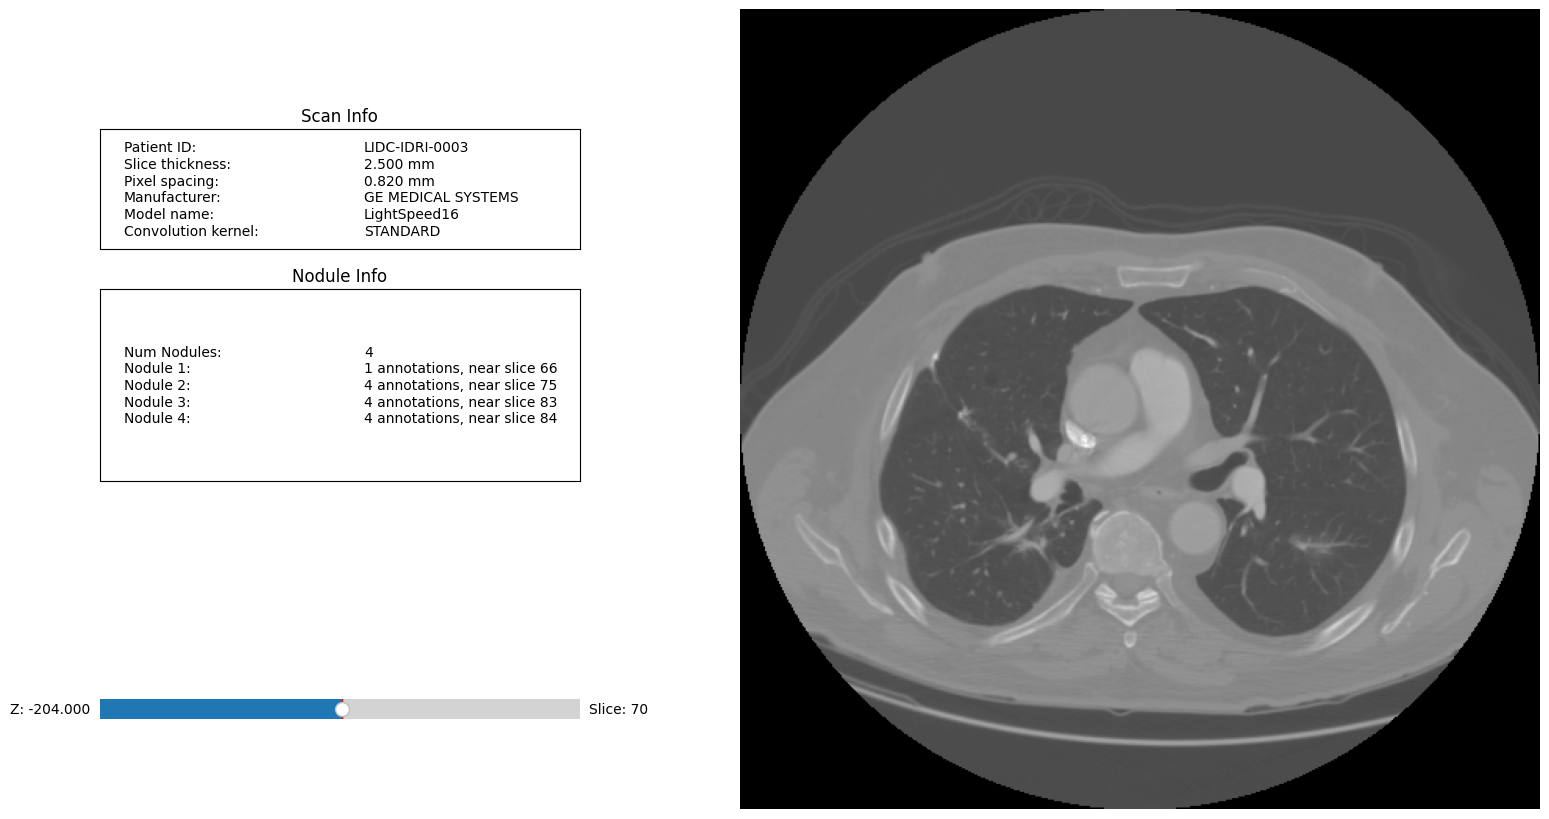

In [26]:
scan.visualize(annotation_groups=nods)

In [86]:
def bb(ann, i, nodule_folder):
    vol = ann.scan.to_volume()
    print(ann)
    print(ann.malignancy, ann.Malignancy)
    padding = [(30,10), (10,25), (0,0)]

    mask = ann.boolean_mask(pad=padding)
    bbox = ann.bbox(pad=padding)

    
    #print(vol[bbox])
    plt.rcParams["figure.autolayout"] = True
    
    img_plot = plt.figure()
    
    #img_plot = plt.imshow(vol[bbox][:,:,-1], cmap=plt.cm.gray)
    #plt.axis('off')
    
    ax = plt.Axes(img_plot, [0., 0., 1., 1.])
    ax.set_axis_off()

    img_plot.add_axes(ax)
    ax.imshow(vol[bbox][:,:,-1], cmap=plt.cm.gray)
    
    images_path = f"{nodule_folder}/images"
    
    if not os.path.exists(images_path):
        os.makedirs(images_path)
    
    image_path = f"{images_path}/ann{i}.png"
    
    
    #plt.tight_layout()

    plt.savefig(image_path, bbox_inches="tight", pad_inches = 0)
    
    plt.show()    
    
    plt.clf()
    
    
    
    mask_plot = plt.imshow(mask[:,:,-1], cmap=plt.cm.gray)
    plt.axis('off')

    masks_path = f"{nodule_folder}/masks"
    
    
    if not os.path.exists(masks_path):
        os.makedirs(masks_path)
    
    mask_path = f"{masks_path}/ann{i}.png"
    
    plt.tight_layout()
    
    plt.savefig(mask_path, bbox_inches="tight", pad_inches = 0)

    plt.show() 
    



Nodule 1
Loading dicom files ... This may take a moment.
Annotation(id=102,scan_id=14)
2 Moderately Unlikely


C:\Users\joaom\AppData\Local\Temp\ipykernel_10820\4041191578.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(image_path, bbox_inches="tight", pad_inches = 0)


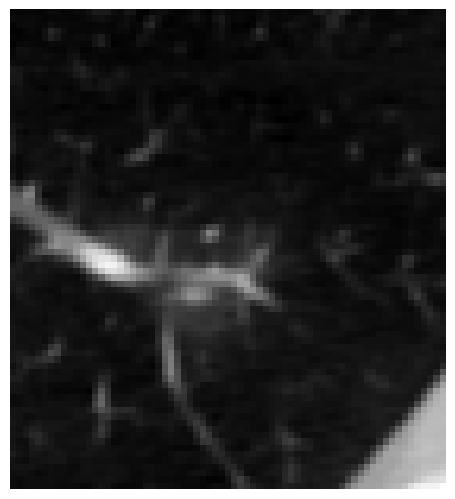

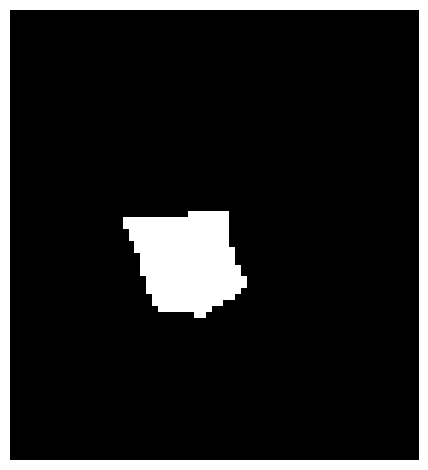

---------------------------
Nodule 2
Loading dicom files ... This may take a moment.
Annotation(id=90,scan_id=14)
5 Highly Suspicious


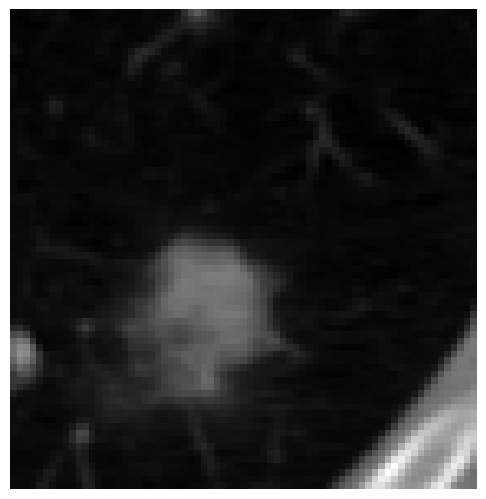

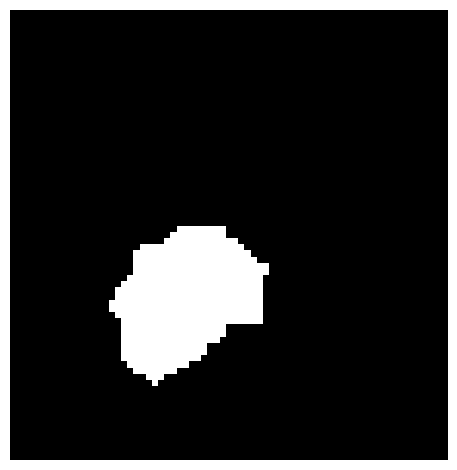

---------------------------
Loading dicom files ... This may take a moment.
Annotation(id=93,scan_id=14)
5 Highly Suspicious


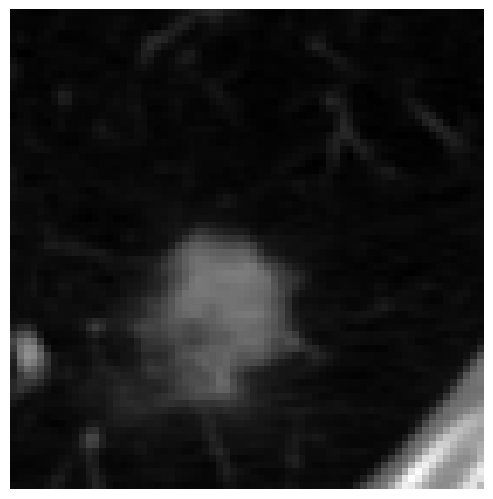

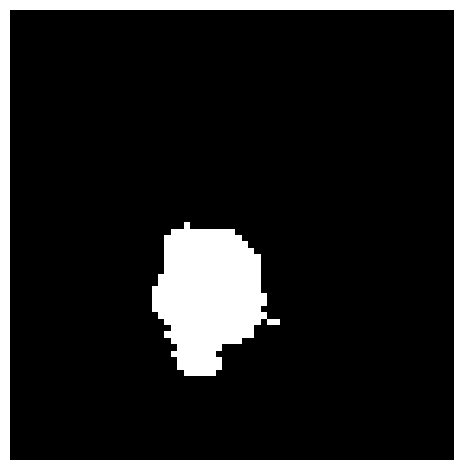

---------------------------
Loading dicom files ... This may take a moment.
Annotation(id=98,scan_id=14)
3 Indeterminate


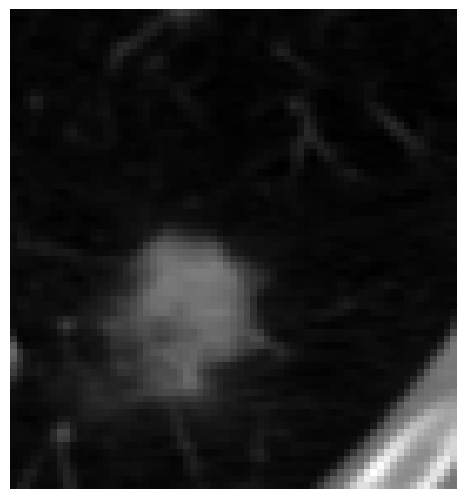

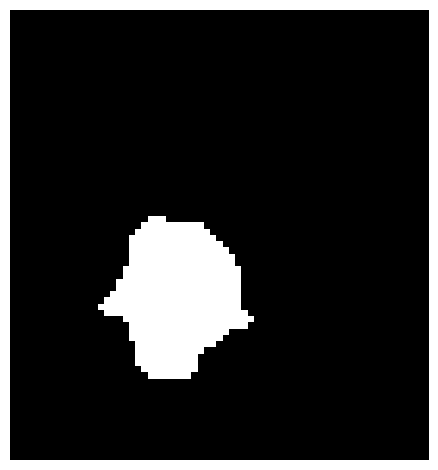

---------------------------
Loading dicom files ... This may take a moment.
Annotation(id=99,scan_id=14)
4 Moderately Suspicious


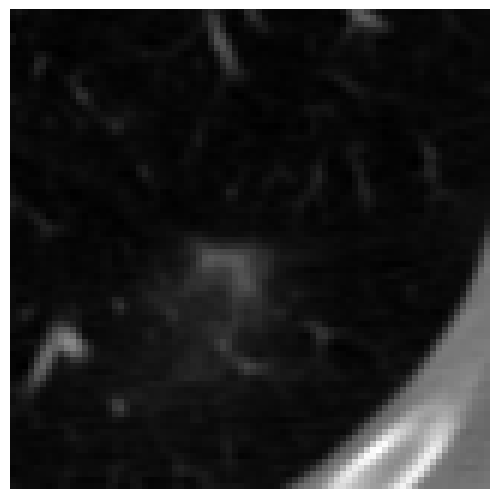

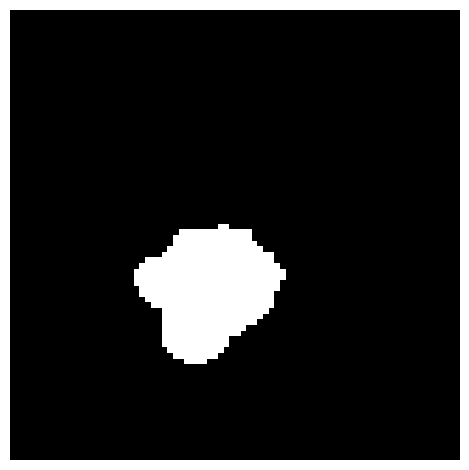

---------------------------
Nodule 3
Loading dicom files ... This may take a moment.
Annotation(id=91,scan_id=14)
4 Moderately Suspicious


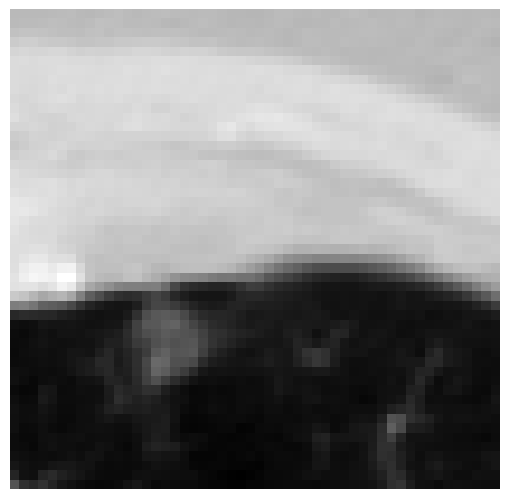

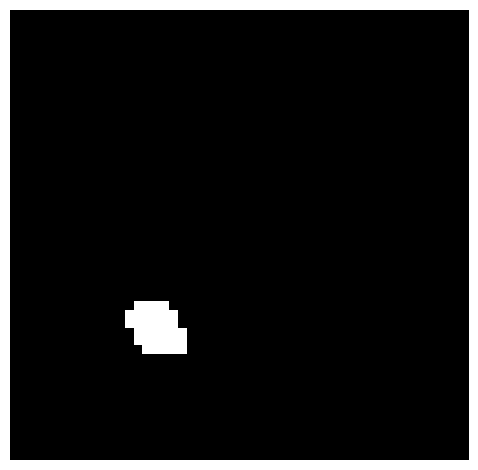

---------------------------
Loading dicom files ... This may take a moment.
Annotation(id=95,scan_id=14)
4 Moderately Suspicious


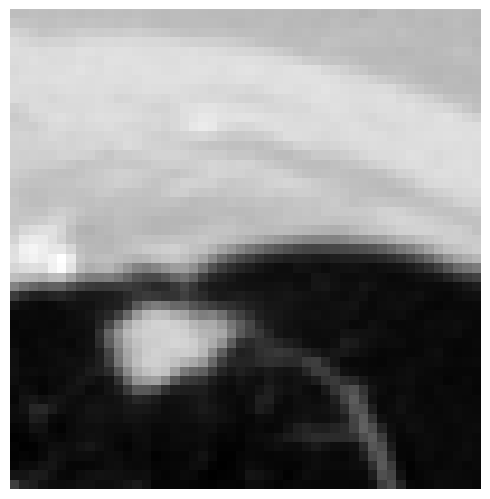

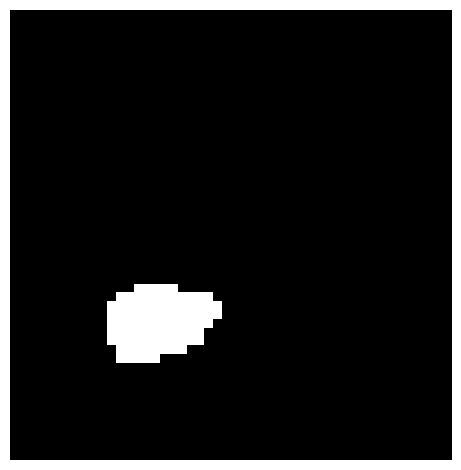

---------------------------
Loading dicom files ... This may take a moment.
Annotation(id=97,scan_id=14)
3 Indeterminate


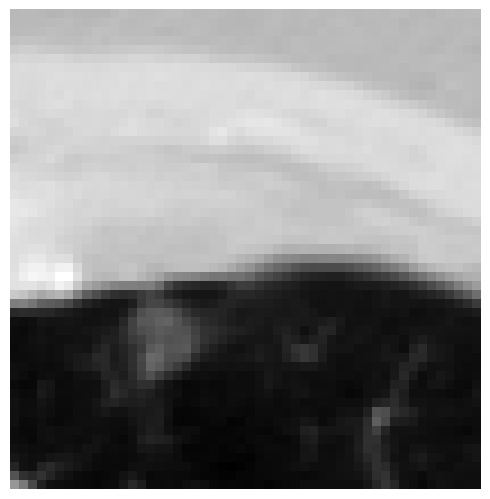

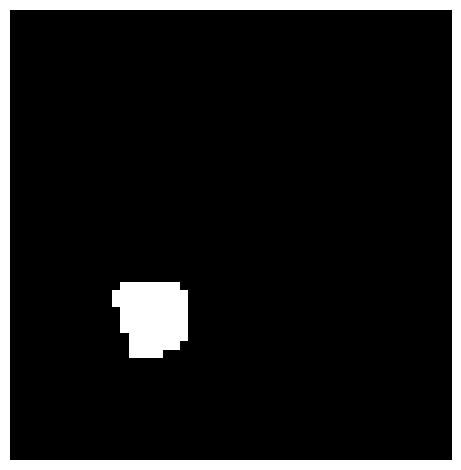

---------------------------
Loading dicom files ... This may take a moment.
Annotation(id=100,scan_id=14)
2 Moderately Unlikely


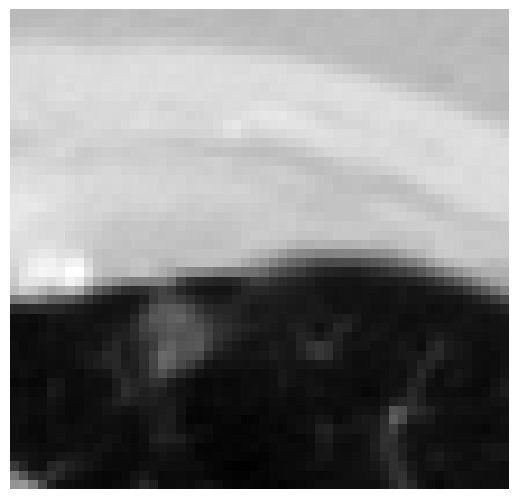

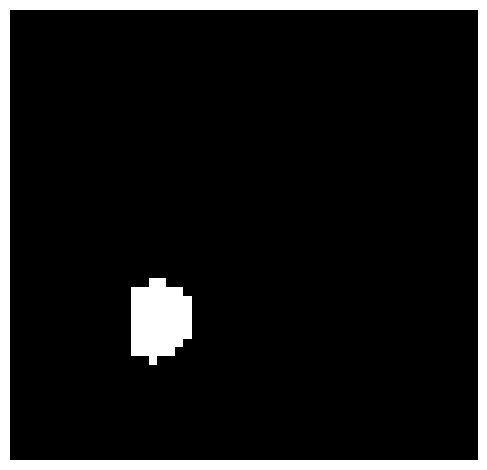

---------------------------
Nodule 4
Loading dicom files ... This may take a moment.
Annotation(id=92,scan_id=14)
4 Moderately Suspicious


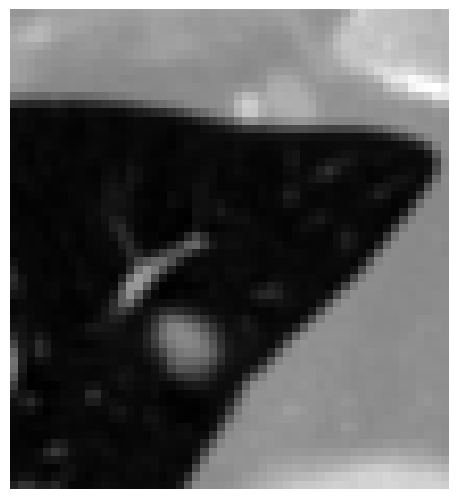

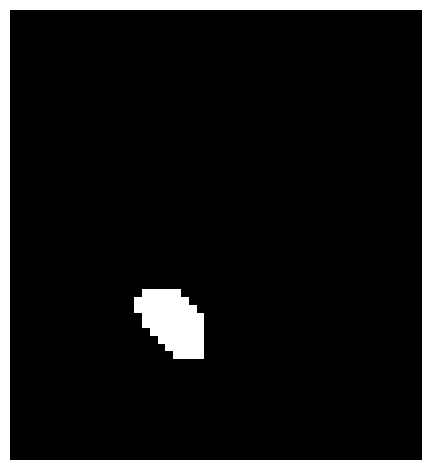

---------------------------
Loading dicom files ... This may take a moment.
Annotation(id=94,scan_id=14)
5 Highly Suspicious


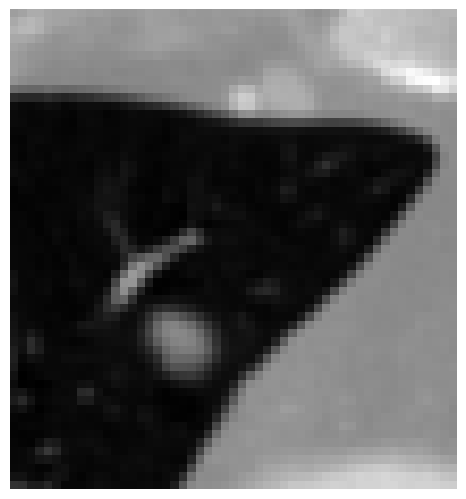

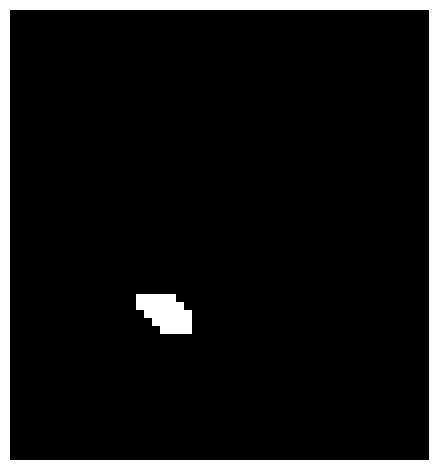

---------------------------
Loading dicom files ... This may take a moment.
Annotation(id=96,scan_id=14)
3 Indeterminate


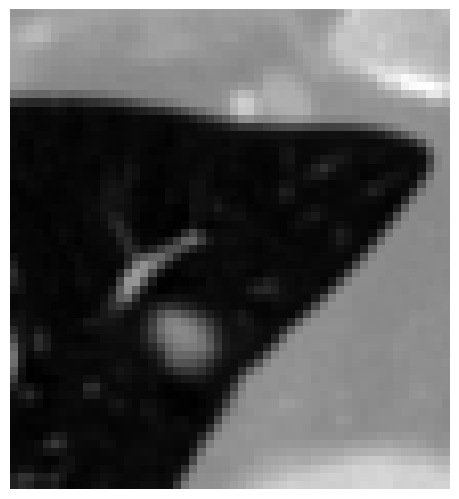

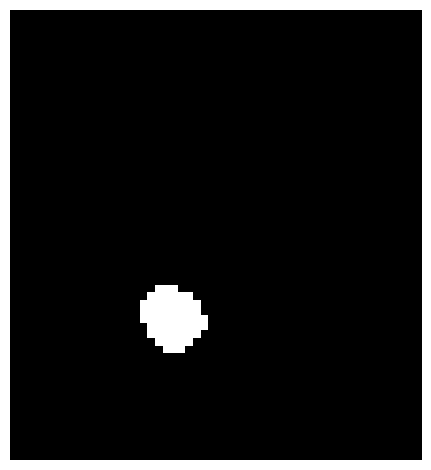

---------------------------
Loading dicom files ... This may take a moment.
Annotation(id=101,scan_id=14)
2 Moderately Unlikely


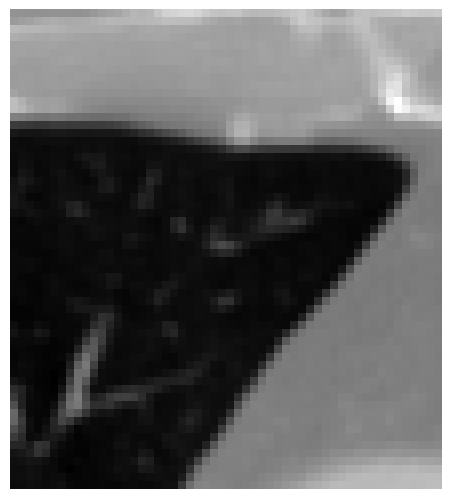

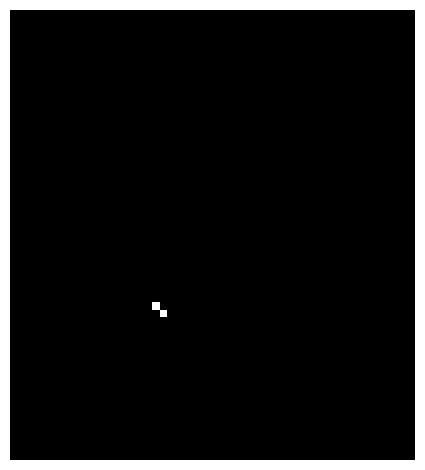

---------------------------


In [87]:
for i, nod in enumerate(nods):
    print(f"Nodule {i+1}")
    nodule_folder = f"C:/Users/joaom/Desktop/imagens_teste/nodule{i+1}"
    if not os.path.exists(nodule_folder):
        os.makedirs(nodule_folder)
    for i, ann in enumerate(nod):
        #print(vol)
        bb(ann, i+1, nodule_folder)
        print("---------------------------")

Nodule 0


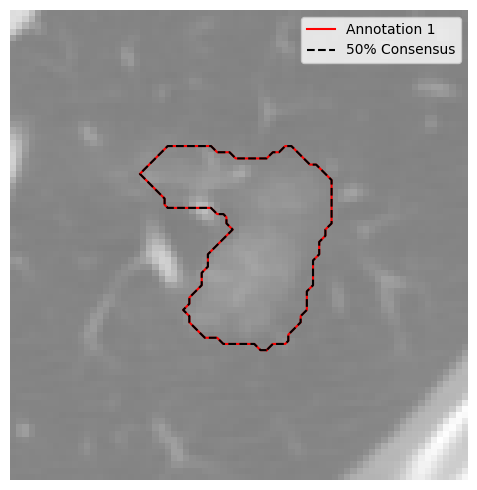

Nodule 1


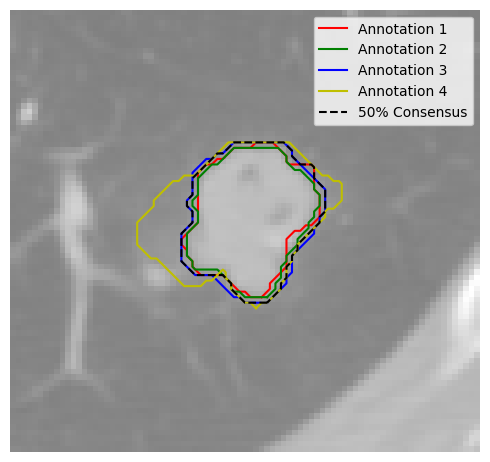

Nodule 2


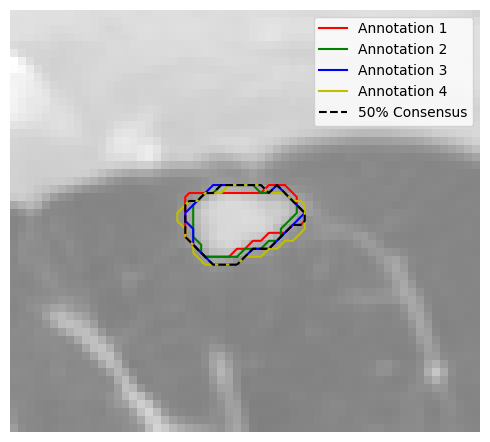

Nodule 3


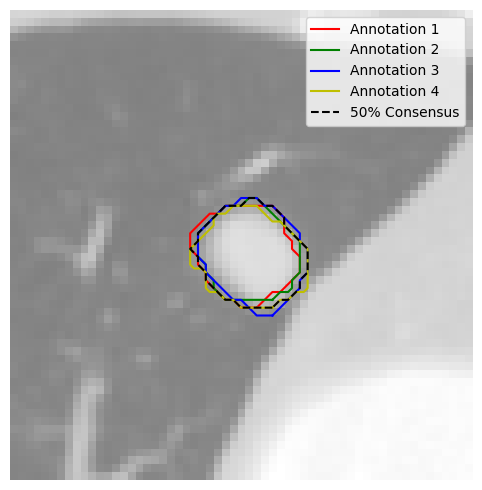

In [30]:
for i, nod in enumerate(nods):
    print(f"Nodule {i}")
    consensu(nod)
    #for ann in nod:
        #print(vol)
    #   bb(ann)
    #   print("---------------------------")

Loading dicom files ... This may take a moment.


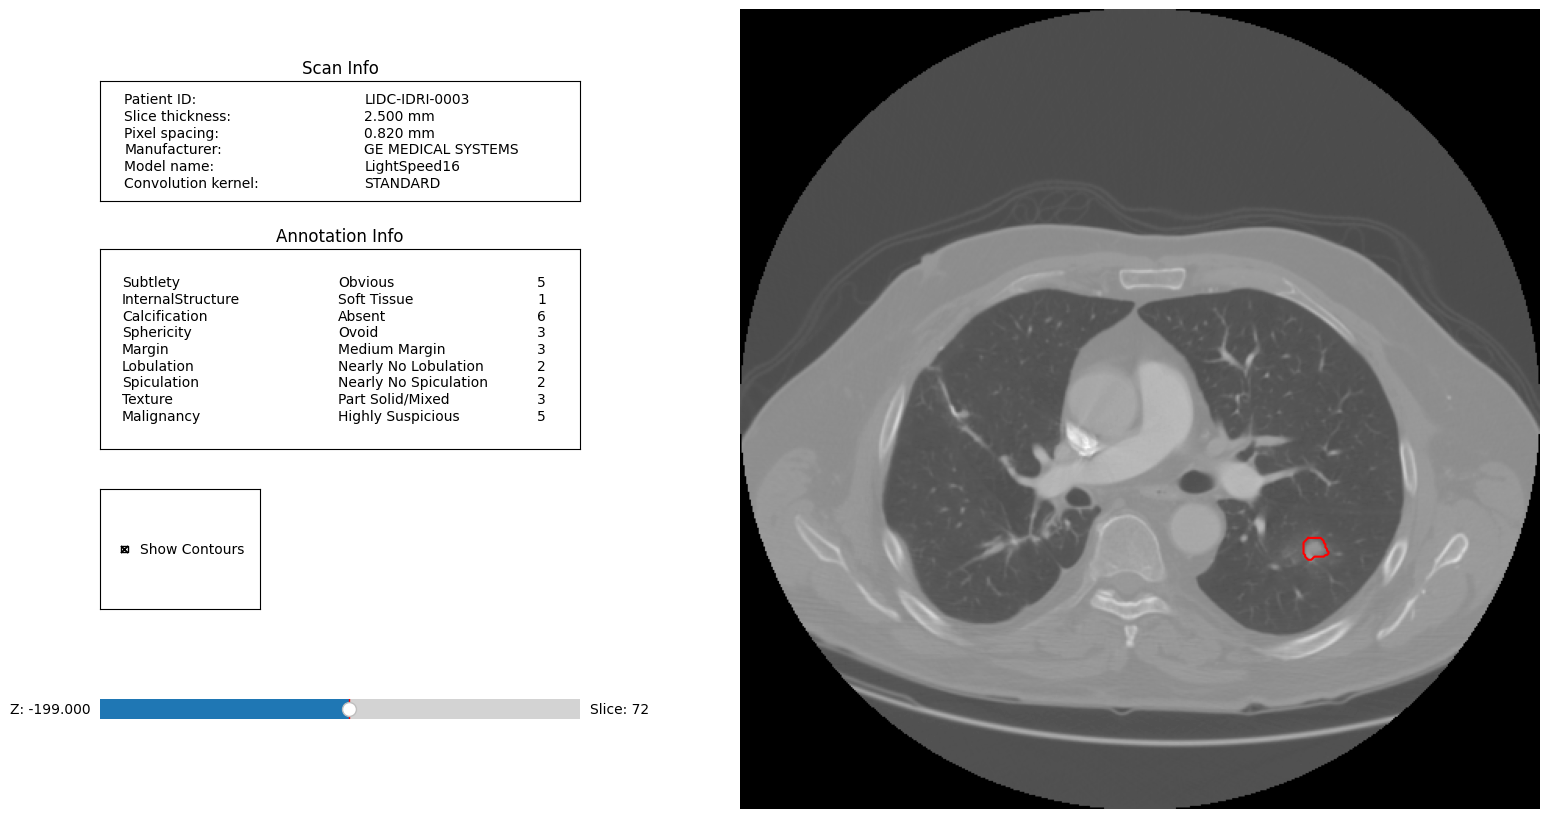

In [31]:
ann = annotations[0]
ann.visualize_in_scan()

In [32]:
def consensu(anns):
    cmask,cbbox,masks = consensus(anns, clevel=0.5, pad=[(20,20), (20,20), (0,0)])

    # Get the central slice of the computed bounding box.
    k = int(0.5*(cbbox[2].stop - cbbox[2].start))

    # Set up the plot.
    fig,ax = plt.subplots(1,1,figsize=(5,5))
    ax.imshow(vol[cbbox][:,:,k], cmap=plt.cm.gray, alpha=0.5)

    # Plot the annotation contours for the kth slice.
    colors = ['r', 'g', 'b', 'y']
    for j in range(len(masks)):
        for c in find_contours(masks[j][:,:,k].astype(float), 0.5):
            label = "Annotation %d" % (j+1)
            plt.plot(c[:,1], c[:,0], colors[j], label=label)

    # Plot the 50% consensus contour for the kth slice.
    for c in find_contours(cmask[:,:,k].astype(float), 0.5):
        plt.plot(c[:,1], c[:,0], '--k', label='50% Consensus')

    ax.axis('off')
    ax.legend()
    plt.tight_layout()
    #plt.savefig("../images/consensus.png", bbox_inches="tight")
    plt.show()